# Stack Overflow Data - 2020 Survey Analysis

### Data Description

The results of this survey reflect the opinions and experiences of nearly 65,000 developers. The survey was conducted in the month of Feburary before the Covid-19 was declared Pandemanic by the WHO.



### What it looks like working in India?

In this Analysis, I have used StackOverflow 2020 data to analysis the opinion of the Indian Developers and their experiences. 

The data can be downloaded from
- [Stack Overflow Survey](https://insights.stackoverflow.com/survey)

### Business Understanding
1. What are Top 10 programming Language Developers have worked on and what desire they want to work next year?
2. What is the salary of the developers with respective to the programming language they work?
3. What is the level of Developer satisfaction grouped by Organisation?
4. What is the salary of the Developer with respective to their Organisation and the language they work in the organisation?
5. What is the Salary of the Developers with respective to their Education level and their major?

#### Understanding the Data

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
import seaborn as sns
from collections import Counter

In [8]:
df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [10]:
df.shape

(64461, 61)

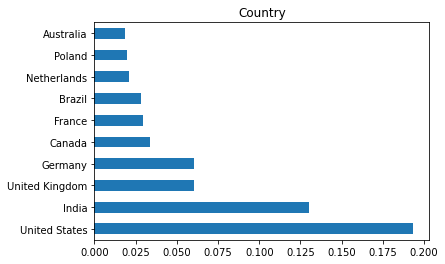

In [11]:
count_vals = df.Country.value_counts()#Provide a pandas series of the counts for each Country

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

(count_vals[:10]/df.shape[0]).plot(kind="barh");
plt.title("Country");
plt.savefig('Country')

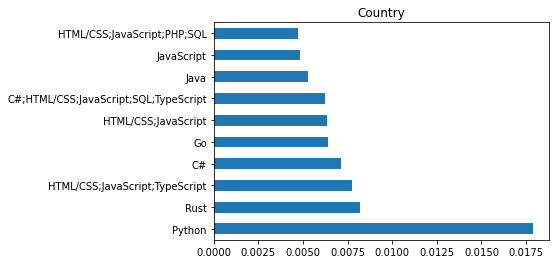

In [12]:
count_vals = df.LanguageDesireNextYear.value_counts()#Provide a pandas series of the counts for each Country

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

(count_vals[:10]/df.shape[0]).plot(kind="barh");
plt.title("Country");

### 1. What are the Top 10 programming Language Worked and Top 10 programming Languge Desire to work next year?

In India what are the top 10 programming language Developers have used and they want to work next year?

In [13]:
def filter_country(df, column_filter, country, columns):
    ''' Filter a dataframe by country.,
        returns filtred dataframe.
    '''
    
    df_copy = df
    
    for column in columns: 
        df_copy = df_copy[df_copy[column_filter] == country].dropna(subset=[column])
        
    return df_copy

# Filter the dataframe by Brazil and selecting some columns.
India = filter_country(df, 'Country', 'India', ['LanguageWorkedWith', 'LanguageDesireNextYear'])

In [14]:
India

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
6,7,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,United States dollar,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,A lot more welcome now than last year,NaN,6,4
21,22,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,Indian rupee,...,Easy,Appropriate in length,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,50.0,10,2
57,58,I am a developer by profession,Yes,NaN,22,NaN,NaN,NaN,India,Indian rupee,...,Neither easy nor difficult,Too long,NaN,Web development or web design,Angular;Angular.js;ASP.NET;ASP.NET Core;jQuery,Angular;Angular.js;ASP.NET;ASP.NET Core;jQuery,NaN,NaN,NaN,NaN
62,63,I am a student who is learning to code,Yes,21.0,17,NaN,NaN,NaN,India,NaN,...,Easy,Appropriate in length,No,NaN,Angular.js;Django;jQuery;Laravel;Vue.js,NaN,Not applicable - I did not use Stack Overflow ...,NaN,4,NaN
147,149,I am a developer by profession,Yes,36.0,31,Yearly,21000000.0,293196.0,India,Indian rupee,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,70.0,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64278,31248,NaN,Yes,35.0,16,NaN,NaN,NaN,India,NaN,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular.js;React.js;Spring,Angular.js;Spring,Just as welcome now as I felt last year,NaN,7,3
64280,32165,NaN,Yes,20.0,12,NaN,NaN,NaN,India,NaN,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core;Django,ASP.NET Core;Django;Drupal;jQuery,Just as welcome now as I felt last year,NaN,8,NaN
64303,37383,NaN,Yes,NaN,NaN,NaN,NaN,NaN,India,NaN,...,NaN,NaN,NaN,NaN,Django,NaN,NaN,NaN,NaN,NaN
64381,52184,NaN,Yes,20.0,17,NaN,NaN,NaN,India,NaN,...,Neither easy nor difficult,Appropriate in length,No,NaN,Angular;Angular.js;jQuery;Ruby on Rails;Vue.js,Django;Flask;React.js,Just as welcome now as I felt last year,NaN,3,NaN


In [15]:
def split_column(df, column):
    ''' Split column by ;,
        returns a splited series.
    '''
    
    df_copy = df
    column_series = df_copy[column].apply(lambda x: x.split(';'))
    
    return column_series
worked_with = split_column(India, 'LanguageWorkedWith')
worked_desire = split_column(India, 'LanguageDesireNextYear')

In [16]:
def disarray(array_list):
    ''' Flat a nested list,
        returns a flat list.
    '''
    
    objects = []
    
    for row in array_list:
        for obj in row:
            objects.append(obj.strip())
            
    return objects

# Flatting nested list objects.
list_worked_with = disarray(worked_with)
list_worked_desire = disarray(worked_desire)

In [17]:
def group_list(data_list):
    ''' Group by count to a list,
        returns a result dict.
    '''
    
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Programming Language':key, 'Count': value} for key, value in grouped_list.items()]
    
    return grouped_dict

# Groping a list and creating a dict.
dict_worked_languages_2020 = group_list(list_worked_with)
dict_wanted_languages_2020 = group_list(list_worked_desire)

In [18]:
def create_dataframe(data_dicts):
    ''' Create two dataframes and append them,
        returns a appended dataframe.
    '''
        
    df1 = pd.DataFrame(data_dicts[0])
    
    return df1

# Creating a Data Frame appending the data.
worked_language = create_dataframe([dict_worked_languages_2020])
desire_language = create_dataframe([dict_wanted_languages_2020])

In [19]:
top_10 = worked_language.sort_values(by = ['Count'], ascending=False).head(10)
top_10_desire = desire_language.sort_values(by = ['Count'], ascending=False).head(10)


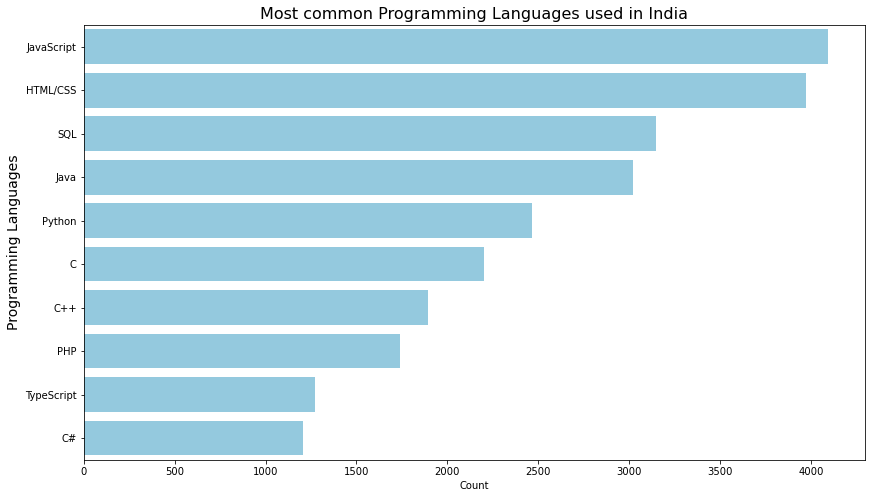

In [20]:
plt.figure(figsize=(14,8))
sns.barplot(x = 'Count', 
            y = 'Programming Language',
            data = top_10,
           color='skyblue')
plt.title('Most common Programming Languages used in India', size = 16)
plt.ylabel("Programming Languages", fontsize = 14)
plt.savefig('used_10')

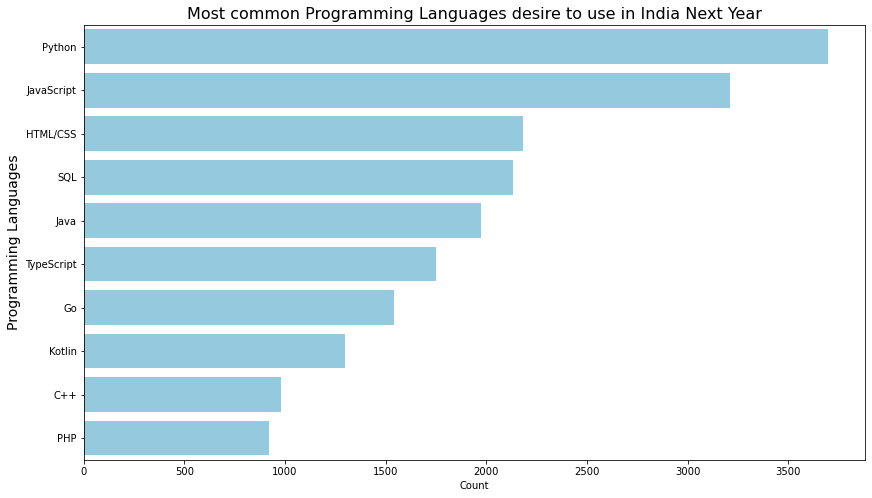

In [21]:
plt.figure(figsize=(14,8))
sns.barplot(x = 'Count', 
            y = 'Programming Language',
            data = top_10_desire,
           color='skyblue')
plt.title('Most common Programming Languages desire to use in India Next Year', size = 16)
plt.ylabel("Programming Languages", fontsize = 14)
plt.savefig('desire_10')

### 2. Salary with respective to Programming Language

**Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks.**

What is the salary of the Developers the Programming Language they use?

In [22]:
def split_column(column_to_split, delimeter, column_to_store, df):
    """
    Method to split a columns values by a provided delimeter while
    retaining the associated value of another column.
    
    :param str column_to_split: column whose values are to be split
    :param str delimeter: delimeter to split by
    :param str columns_to_store: column who's data must be stored along split rows
    :param DataFrame df: dataframe to use
    """
    split_col = pd.DataFrame(columns = [column_to_split, column_to_store])
    for index, row in df.iterrows():
        columns = row[column_to_split].split(delimeter)
        for c in columns:
            split_col.loc[len(split_col)] = [c, row[column_to_store]]
    return split_col

In [23]:
q = India[['MainBranch', 'LanguageWorkedWith', 'ConvertedComp']]
q = q[q.MainBranch == 'I am a developer by profession']
q = q.drop('MainBranch',1)
q = q.dropna(subset = ['ConvertedComp','LanguageWorkedWith'],axis = 0)
q.head()

,LanguageWorkedWith,ConvertedComp
147,Bash/Shell/PowerShell;C++;Perl,293196.0
225,Java;JavaScript;Python,11728.0
277,Bash/Shell/PowerShell;C++;HTML/CSS;JavaScript;...,150792.0
320,HTML/CSS;JavaScript;PHP;SQL;TypeScript,4188.0
412,Python;R;Scala,23735.0


In [24]:
s_l = split_column("LanguageWorkedWith", ";", "ConvertedComp" , q)
s_l.head()

,LanguageWorkedWith,ConvertedComp
0,Bash/Shell/PowerShell,293196.0
1,C++,293196.0
2,Perl,293196.0
3,Java,11728.0
4,JavaScript,11728.0


In [25]:
q_a = pd.DataFrame(s_l.groupby(['LanguageWorkedWith']).mean()['ConvertedComp'].sort_values())
q_a = q_a.reset_index()

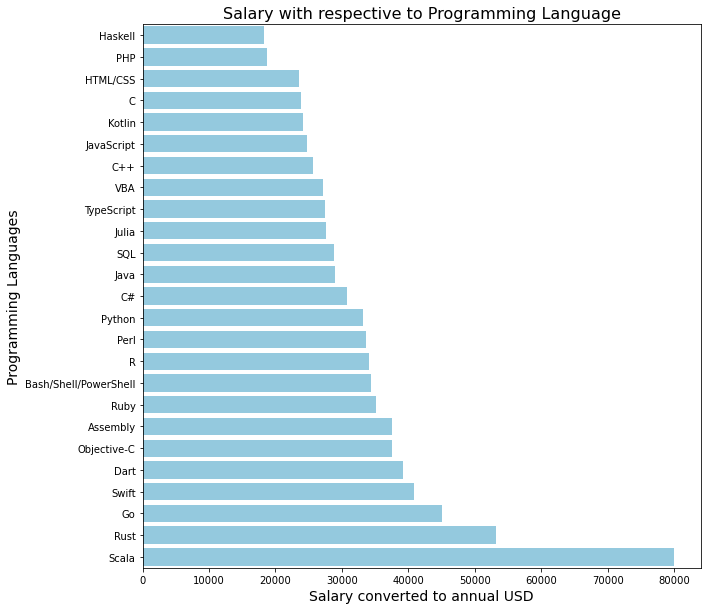

In [26]:
plt.figure(figsize=(10,10))
sns.barplot(x ='ConvertedComp',
           y = 'LanguageWorkedWith',
           data = q_a,
           color = 'skyblue')
plt.title('Salary with respective to Programming Language', size = 16)
plt.ylabel("Programming Languages", fontsize = 14)
plt.xlabel("Salary converted to annual USD",fontsize = 14)
plt.savefig('salary_program')

### 3. Levels of Developer Satisfaction Grouped By Oragnisation

After knowing the salary of the Developers what is the levels of Developers satisfaction grouped by organisation?

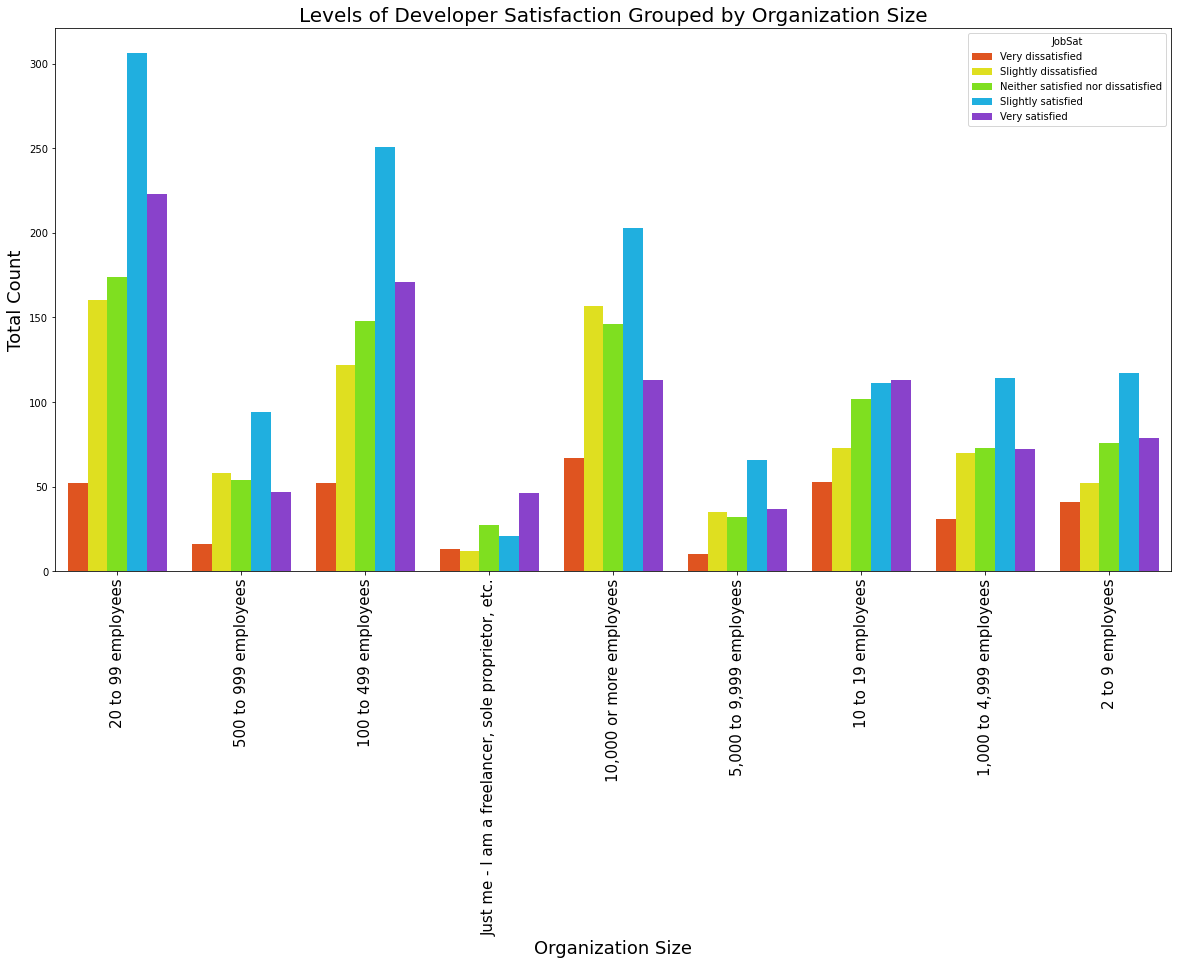

In [39]:
# Make a new dataframe that drops all rows with null values in the OrgSize and JobSat columns
df2 = India.dropna(subset=['OrgSize', 'JobSat'], axis=0)

# Make a clustered bar chart of job satisfaction grouped by organization size
palette={'Very dissatisfied':'orangered', 'Slightly dissatisfied':'yellow',
         'Neither satisfied nor dissatisfied':'chartreuse', 'Slightly satisfied':'deepskyblue',
         'Very satisfied':'blueviolet'}
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(ax=ax ,x='OrgSize', hue='JobSat', data=df2,
              
              hue_order=['Very dissatisfied', 'Slightly dissatisfied',
                        'Neither satisfied nor dissatisfied',
                        'Slightly satisfied', 'Very satisfied'],
              palette=palette)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=90)
ax.set_title('Levels of Developer Satisfaction Grouped by Organization Size', fontsize=20)
ax.set_xlabel('Organization Size', fontsize=18)
ax.set_ylabel('Total Count', fontsize=18);
plt.savefig('JobSat')

### 4. What Highest Salary Earning Grouped by their Programming Language they work and Organisation Size?

I wanted to know which Programming Language has the highest earn and for which organisation size.

In [28]:
def split_column1(column_to_split, delimeter, column_to_store, store, df):
    """
    Method to split a columns values by a provided delimeter while
    retaining the associated value of another column.
    
    :param str column_to_split: column whose values are to be split
    :param str delimeter: delimeter to split by
    :param str columns_to_store: column who's data must be stored along split rows
    :param DataFrame df: dataframe to use
    """
    split_col = pd.DataFrame(columns = [column_to_split, column_to_store, store])
    for index, row in df.iterrows():
        columns = row[column_to_split].split(delimeter)
        for c in columns:
            split_col.loc[len(split_col)] = [c, row[column_to_store],row[store]]
    return split_col

In [29]:
q1 = India[['MainBranch', 'LanguageWorkedWith','OrgSize' , 'ConvertedComp']]
q1 = q1[q1.MainBranch == 'I am a developer by profession']
q1 = q1.drop('MainBranch',1)
q1 = q1.dropna(subset = ['ConvertedComp','LanguageWorkedWith','OrgSize'],axis = 0)
q1.head()

,LanguageWorkedWith,OrgSize,ConvertedComp
147,Bash/Shell/PowerShell;C++;Perl,500 to 999 employees,293196.0
225,Java;JavaScript;Python,100 to 499 employees,11728.0
277,Bash/Shell/PowerShell;C++;HTML/CSS;JavaScript;...,100 to 499 employees,150792.0
320,HTML/CSS;JavaScript;PHP;SQL;TypeScript,20 to 99 employees,4188.0
412,Python;R;Scala,100 to 499 employees,23735.0


In [30]:
s_ = split_column1("LanguageWorkedWith", ";", "ConvertedComp" ,"OrgSize", q1)

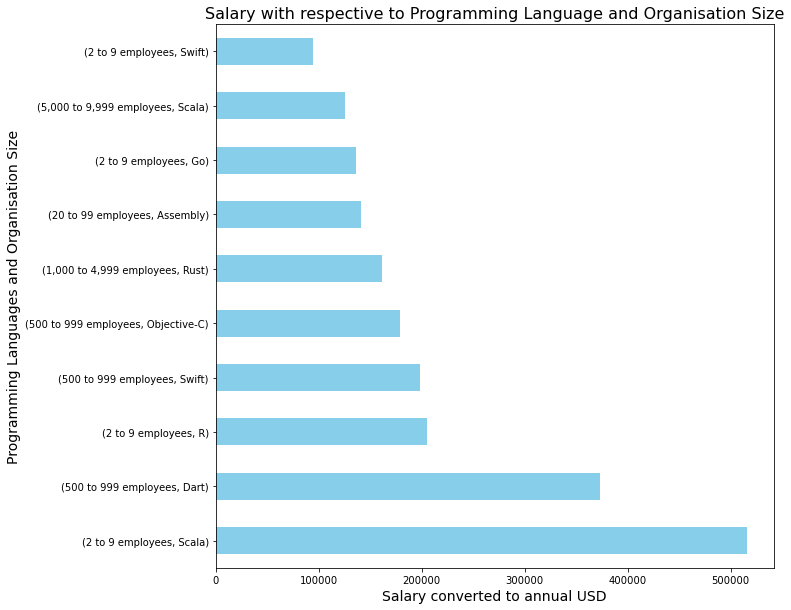

In [31]:
s1 = s_.groupby(['OrgSize','LanguageWorkedWith'])['ConvertedComp'].mean().sort_values(ascending=False).nlargest(10)
plt.figure(figsize=(10,10))
s1.plot(kind = 'barh',color='skyblue')
plt.title('Salary with respective to Programming Language and Organisation Size', size = 16)
plt.ylabel("Programming Languages and Organisation Size", fontsize = 14)
plt.xlabel("Salary converted to annual USD",fontsize = 14)
plt.savefig('salary_program_org')

### 5. Which Education Level and Major has the highest salary?

I wanted to know the developers education level and their major and how much they earn.

Text(0.5, 1.0, 'Formal Education')

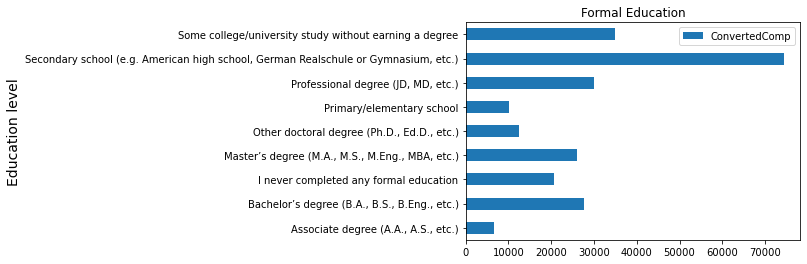

In [32]:
ud=pd.DataFrame(India.query("MainBranch == 'I am a developer by profession'").groupby(['EdLevel']).mean()['ConvertedComp'])
ud.plot(kind='barh')
plt.ylabel('Education level',fontsize = 14)
plt.title('Formal Education')

In [33]:
udm = India[['MainBranch','EdLevel','UndergradMajor','ConvertedComp']]
udm = udm[udm.MainBranch == 'I am a developer by profession']
udm = udm.drop('MainBranch',1)
udm = udm.dropna(subset = ['ConvertedComp','EdLevel','UndergradMajor'],axis = 0)
udm

,EdLevel,UndergradMajor,ConvertedComp
147,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",293196.0
225,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",11728.0
277,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",150792.0
320,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",4188.0
412,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",23735.0
...,...,...,...
63114,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",16056.0
63449,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",18848.0
64048,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",16754.0
64053,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",75396.0


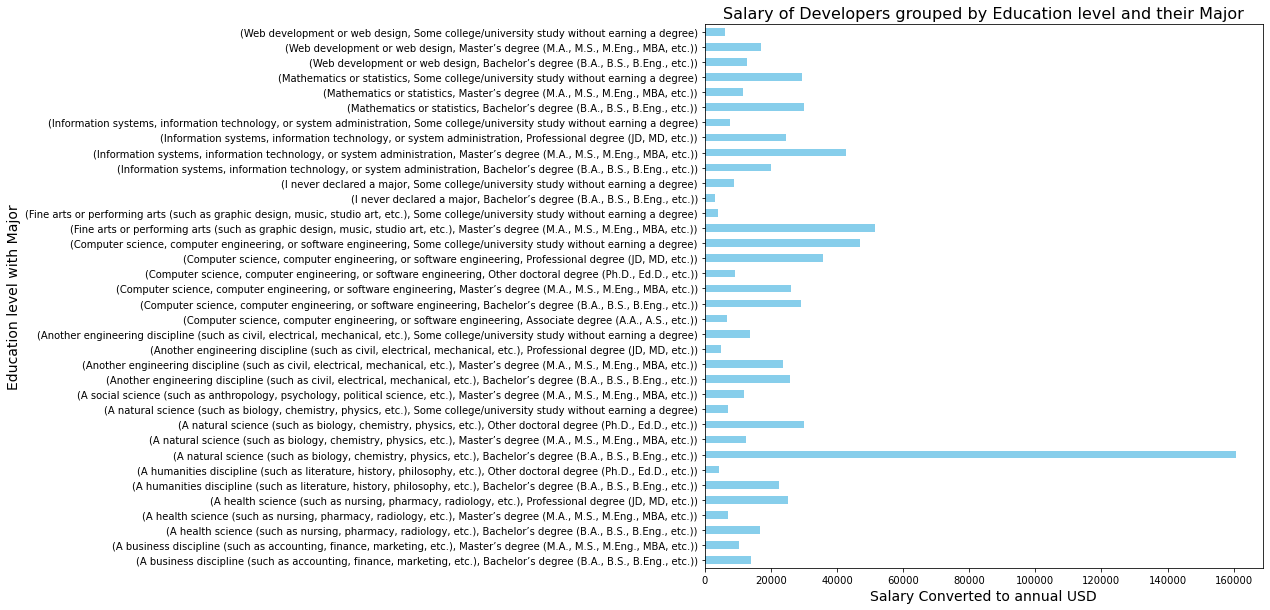

In [34]:
udm1 = udm.groupby(['UndergradMajor','EdLevel']).mean()['ConvertedComp']
plt.figure(figsize=(10,10))
udm1.plot(kind = 'barh',color='skyblue')
plt.xlabel('Salary Converted to annual USD',fontsize = 14)
plt.ylabel('Education level with Major',fontsize = 14)
plt.title('Salary of Developers grouped by Education level and their Major',fontsize = 16)
plt.savefig('salary_program_edlevel')

## CONCLUSION

- JavaScript is the most Language used and Python is the language is most desired language to work next year.
- Scala has the highest earning in the 2-9 Organisation Size.
- Natuaral Science undergraduation major has the highest salary.